In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from sklearn.metrics import classification_report

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

## 2. Load Model

In [3]:
clf = joblib.load('XGBoostBestParameters.pkl') 

In [4]:
df_features = pd.DataFrame(columns=['Name', 'OOB'])
df_features.set_index('Name', inplace=True)
df_features.head()

,OOB
Name,


In [5]:
for feature in zip(X_train_resampled.columns.values, clf.feature_importances_):
    print(feature)
    df_features.at[feature[0]] = feature[1]

('V1', 0.015738424)
('V2', 0.009887823)
('V3', 0.015156828)
('V4', 0.036970954)
('V5', 0.0073267766)
('V6', 0.005552047)
('V7', 0.014864188)
('V8', 0.023800774)
('V9', 0.015630946)
('V10', 0.025369314)
('V11', 0.011247503)
('V12', 0.03612378)
('V13', 0.011618476)
('V14', 0.51474357)
('V15', 0.0064130044)
('V16', 0.01765904)
('V17', 0.060466785)
('V18', 0.007835108)
('V19', 0.019878456)
('V20', 0.02212114)
('V21', 0.015477047)
('V22', 0.012847009)
('V23', 0.009857022)
('V24', 0.0060094004)
('V25', 0.0112350155)
('V26', 0.013266663)
('V27', 0.013473553)
('V28', 0.005737071)
('Scaled_Amount', 0.01987825)
('Scaled_Time', 0.013814142)


In [6]:
df_features.sort_values("OOB", axis=0, ascending=False, inplace=True)
df_features.head()

,OOB
Name,
V14,0.514744
V17,0.0604668
V4,0.036971
V12,0.0361238
V10,0.0253693


## 4. Plot OOB Score

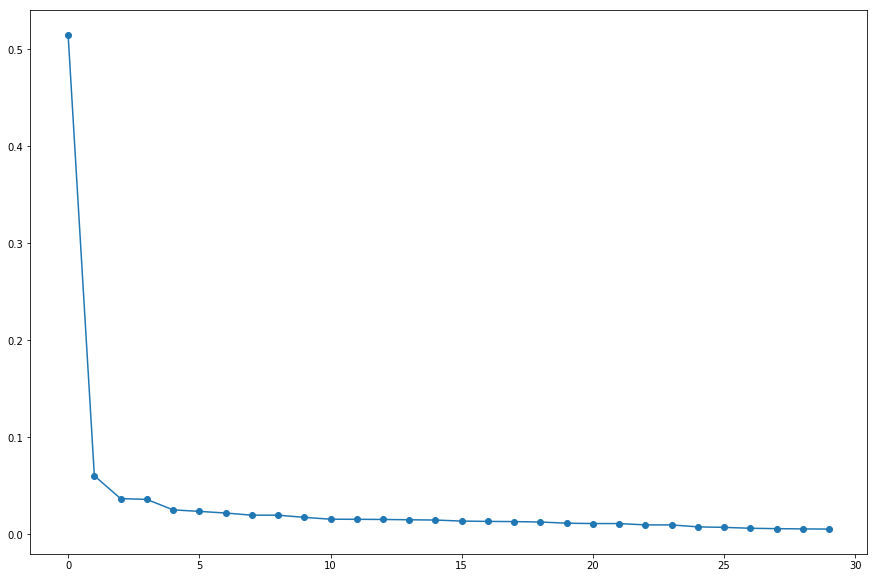

In [7]:
plt.figure(figsize = (15,10))
plt.plot(df_features['OOB'].values, "o-")
plt.show()

## 5. Save features

In [8]:
df_features.to_csv("XGBoost (AllFeatures - OOB).csv")


In [9]:
df_features[:4].to_csv("Random Forest (AllFeatures - OOB - 4).csv")